In [68]:
import os
import matplotlib.pyplot as plt
import spacy
from collections import Counter

nlp = spacy.load("en_core_web_sm")

In [56]:
def find_verb(sent):
    """ Find verb/root, works only for English. """
    to_remove = ['[SEP]', '[CLS]', '<pad>']
    temp = [x for x in sent.replace(' ##', '').strip().split(' ') if not x in to_remove]
    
    doc = nlp(' '.join(temp))
    head = False
    head_idx = False
    lemma = False
    for num, token in enumerate(doc):
        if token.pos_ == 'VERB' and token.dep_ == 'ROOT':
            head = token.text
            head_idx = num
            lemma = token.lemma_
    if not head:
        for token in doc:
            if token.dep_ == 'ROOT':
                head = token.text
                head_idx = num
                lemma = token.lemma_

    return temp, head, head_idx, lemma

In [47]:
# see all the X models for Y trained on Z

data_source = 'friedrich_captions_data'
marker = 'telicity'
model = 'bert'

files = [f for f in os.listdir(data_source + '/' + marker) if f.endswith('.log') 
         if f.startswith(marker) if f.split('_')[1].startswith(model)]

sents = {}
for file in files:
    sents[file] = {}
    with open(data_source + '/' + marker + '/' + file, 'r') as f:
        wrong = []
        right = []

        for line in f:
            if line.startswith('wrong label:'):
                l = line.strip().split('\t')
                wrong.append([int(l[0][-1]), # label
                              float(l[1][7:-1].split(', ')[int(l[0][-1])]), # prob of prediction
                              l[2]]) # sent)
            elif line.startswith('right label:'):
                l = line.strip().split('\t')
                right.append([int(l[0][-1]), 
                              float(l[1][7:-1].split(', ')[int(l[0][-1])]),
                              l[2]])

    sents[file]['wrong'] = wrong
    sents[file]['right'] = right


In [48]:
# Show 10 sentences for which the models were confident but wrong

for f, v in sents.items():
    print('\n===== ' + f[:-4] + ' =====')
    wrong_telic = []
    wrong_atelic = []
    for sent in v['wrong']:
        if sent[0] == 0 and sent[1] > 0.8:
            wrong_telic.append(sent[2])
        elif sent[0] == 1 and sent[1] > 0.8:
            wrong_atelic.append(sent[2])
            
    print('Wrong Telic:')
    for s in wrong_telic[:10]:
        #print('\t', s)
        print(find_verb(s))
    
    print('\nWrong Atelic:')
    for s in wrong_atelic[:10]: 
        #print('\t', s)
        print(find_verb(s))


===== telicity_bert-base-cased_yes =====
Wrong Telic:
(['I', 'would', 'wake', 'late', ',', 'checking', 'the', 'clock', 'on', 'my', 'room', "'", 's', 'lightscreen', 'to', 'make', 'sure', 'I', 'had', 'n', "'", 't', 'slept', 'through', 'brunch', '.'], 'wake', 2)
(['They', 'began', 'the', 'process', 'of', 'building', 'their', 'strong', 'citadels', ',', 'and', 'reinforcing', 'the', 'Christian', 'faith', 'on', 'the', 'islands', '.'], 'began', 1)
(['Youll', 'be', 'used', 'to', 'the', 'sensation', 'in', 'a', 'moment', '.', '”', 'That', 'just', 'unnerved', 'me', 'more', '.'], 'unnerved', 14)
(['It', 'wont', 'refill', 'your', 'blood', 'supply', ',', 'but', 'while', 'thats', 'in', 'your', 'system', ',', 'you', 'wont', 'even', 'need', 'blood', '.', '”', 'He', 'grinned', 'at', 'me', '.'], 'grinned', 25)
(['But', 'we', 'see', 'new', 'faces', '.', '”', 'You', "'", 're', 'sure', 'it', "'", 's', 'not', 'just', 'some', 'people', 'being', 'indisposed', '?'], 're', 9)
(['I', 'did', 'not', 'ask', 'questio

(['but', 'he', 'also', 'brought', 'with', 'him', 'a', 'feeling', 'of', 'strict', 'attention', 'to', 'everything', 'that', 'was', 'the', 'vezir', "'", 's', 'will', 'or', 'order', ',', 'but', 'like', 'a', 'calm', ',', 'normal', 'and', 'honest', 'man', 'who', 'had', 'nothing', 'to', 'be', 'afraid', 'of', 'and', 'nothing', 'to', 'conceal', ',', 'so', 'that', 'he', 'had', 'no', 'need', 'to', 'frighten', 'or', 'persecute', 'anyone', '.'], 'brought', 3)
(['the', 'gun', 'control', 'movement', ',', 'on', 'the', 'other', 'hand', ',', 'distracts', 'from', 'the', 'real', 'causes', 'of', 'violence', '-', '-', 'poverty', ',', 'paranoia', ',', 'the', '"', 'war', 'on', 'drugs', '"', 'and', 'antisexuality', '.'], 'distracts', 10)
(['i', 'wondered', 'how', 'many', 'people', 'it', 'treated', '.'], 'wondered', 1)
(['his', 'long', ',', 'frequently', 'washed', 'and', 'dried', 'fingers', 'rummaged', 'the', 'whole', 'day', 'through', 'numerous', 'small', 'objects', ',', 'grating', ',', 'pounding', ',', 'pasti

(['I', 'would', 'wake', 'late', ',', 'checking', 'the', 'clock', 'on', 'my', 'room', "'", 's', 'lightscreen', 'to', 'make', 'sure', 'I', 'had', 'n', "'", 't', 'slept', 'through', 'brunch', '.'], 'wake', 2)
(['They', 'began', 'the', 'process', 'of', 'building', 'their', 'strong', 'citadels', ',', 'and', 'reinforcing', 'the', 'Christian', 'faith', 'on', 'the', 'islands', '.'], 'began', 1)
(['Youll', 'be', 'used', 'to', 'the', 'sensation', 'in', 'a', 'moment', '.', '”', 'That', 'just', 'unnerved', 'me', 'more', '.'], 'unnerved', 14)
(['It', 'wont', 'refill', 'your', 'blood', 'supply', ',', 'but', 'while', 'thats', 'in', 'your', 'system', ',', 'you', 'wont', 'even', 'need', 'blood', '.', '”', 'He', 'grinned', 'at', 'me', '.'], 'grinned', 25)
(['But', 'we', 'see', 'new', 'faces', '.', '”', 'You', "'", 're', 'sure', 'it', "'", 's', 'not', 'just', 'some', 'people', 'being', 'indisposed', '?'], 're', 9)
(['I', 'did', 'not', 'ask', 'questions', '.'], 'ask', 3)
(['This', 'is', 'the', 'first', 'p


telicity_bert-base-cased_yes


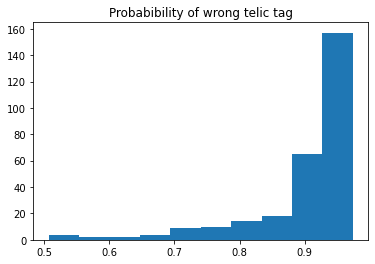

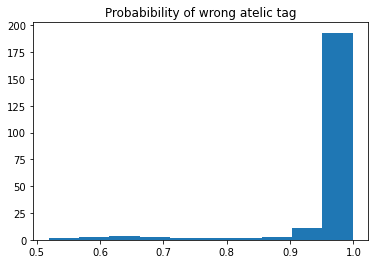


telicity_bert-large-uncased_no


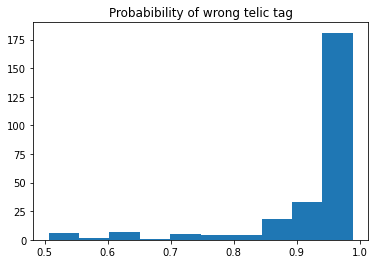

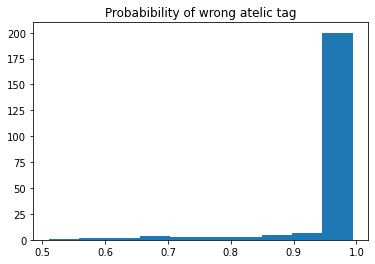


telicity_bert-base-uncased_no


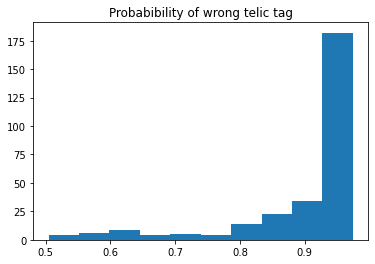

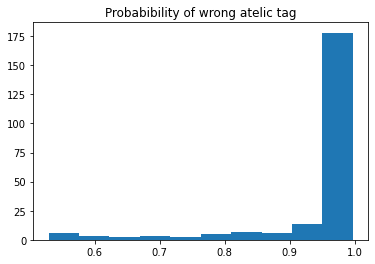


telicity_bert-large-uncased_yes


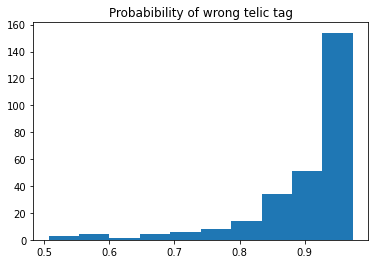

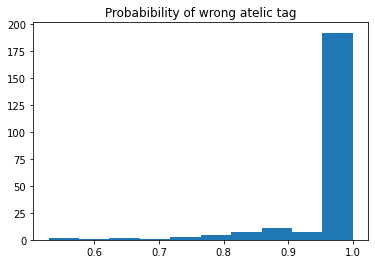


telicity_bert-base-uncased_yes


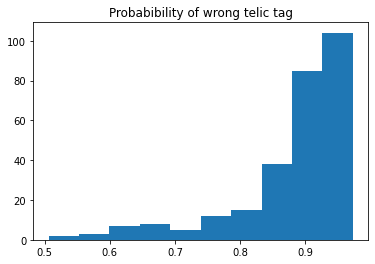

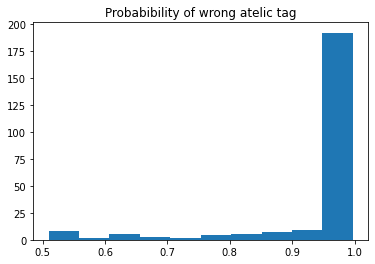


telicity_bert-base-cased_no


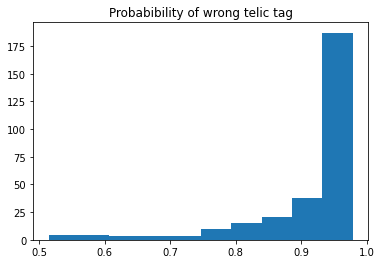

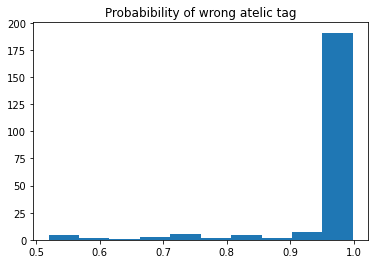


telicity_bert-large-cased_yes


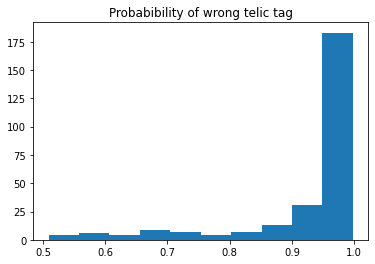

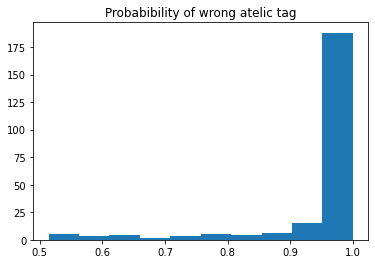


telicity_bert-large-cased_no


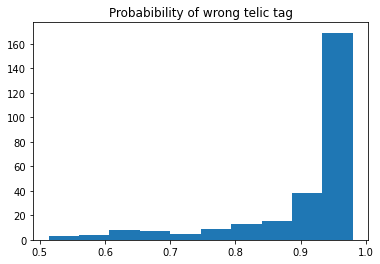

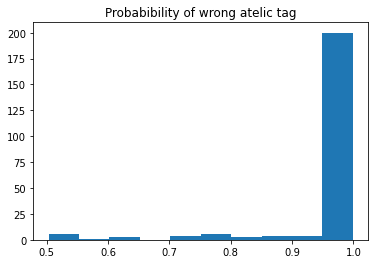

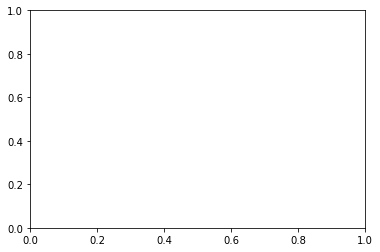

In [55]:
# Print histograms of probabilities

for f, v in sents.items():
    print()
    print(f[:-4])
    wrong_telic = []
    wrong_atelic = []
    for sent in v['wrong']:
        if sent[0] == 0:
            wrong_telic.append(sent[1])
        else:
            wrong_atelic.append(sent[1])
            

    plt.title('Probabibility of wrong telic tag')
    plt.hist(wrong_telic)
    plt.show()
    plt.cla()

    plt.title('Probabibility of wrong atelic tag')
    plt.hist(wrong_atelic)
    plt.show()
    plt.cla()

<ipython-input-93-a003b952d965>:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xticklabels(labels)


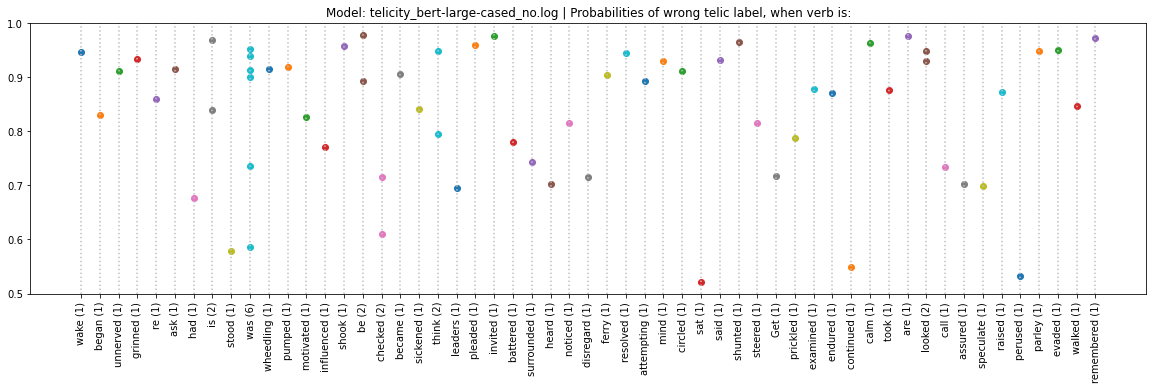

<ipython-input-93-a003b952d965>:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xticklabels(labels)


<Figure size 432x288 with 0 Axes>

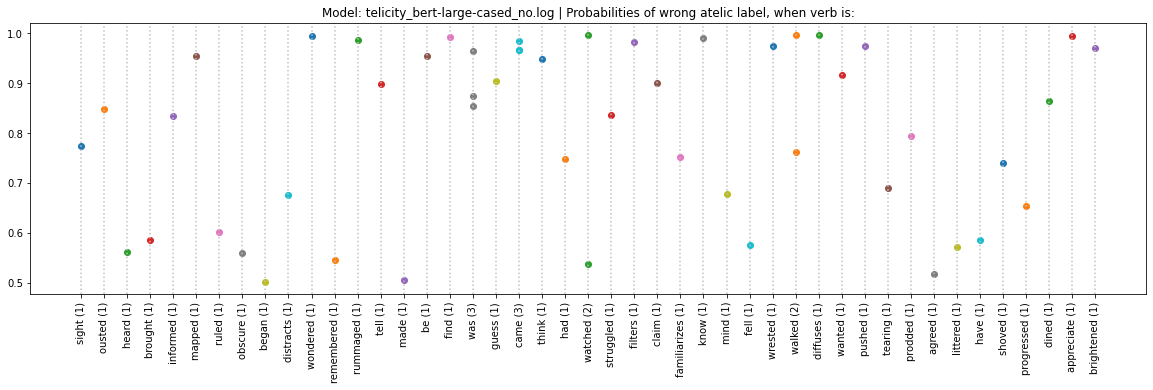

In [93]:
# Find verbs and print distr of verbs-probs

for f, v in sents.items():
    
    wrong_telic_verbs = {}
    wrong_atelic_verbs = {}
    
    for sent in v['wrong']:
        s, verb, verb_idx, lemma = find_verb(sent[2])
        if sent[0] == 0:
            if not verb in wrong_telic_verbs:
                wrong_telic_verbs[verb] = []
            wrong_telic_verbs[verb].append(sent[1])
        elif sent[0] == 1:
            if not verb in wrong_atelic_verbs:
                wrong_atelic_verbs[verb] = []
            wrong_atelic_verbs[verb].append(sent[1])
            
# Plot wrong telic verbs

x = [n for n in range (len(wrong_telic_verbs))]
y = [v for v in wrong_telic_verbs.values()]

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
for xe, ye in zip(x, y):
    plt.axvline(xe, 0, 1, color='silver', linestyle=':')
    plt.scatter([xe] * len(ye), ye)

plt.title('Model: ' + f + ' | Probabilities of wrong telic label, when verb is:')
labels = [k + ' (' + str(len(v)) + ')' for k, v in wrong_telic_verbs.items()]
plt.xticks(x, rotation=90)
plt.axes().set_xticklabels(labels)
plt.show()

# Plot wrong atelic verbs

x = [n for n in range (len(wrong_atelic_verbs))]
y = [v for v in wrong_atelic_verbs.values()]

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
for xe, ye in zip(x, y):
    plt.axvline(xe, 0, 1, color='silver', linestyle=':')
    plt.scatter([xe] * len(ye), ye)

plt.title('Model: ' + f + ' | Probabilities of wrong atelic label, when verb is:')
labels = [k + ' (' + str(len(v)) + ')' for k, v in wrong_atelic_verbs.items()]
plt.xticks(x, rotation=90)
plt.axes().set_xticklabels(labels)
plt.show()

In [59]:
# plot all the verbs, prob of sentence / verb


for f, v in sents.items():
    
    count_telic_verbs = {}
    count_atelic_verbs = {}
    
    for sent in v['wrong']:
        s, verb, verb_idx, lemma = find_verb(sent[2])
        if sent[0] == 0:
            if not lemma in count_telic_verbs:
                count_telic_verbs[lemma] = []
            count_telic_verbs[lemma].append(sent[1])
        elif sent[0] == 1:
            if not lemma in count_atelic_verbs:
                count_atelic_verbs[lemma] = []
            count_atelic_verbs[lemma].append(sent[1])
            
    for sent in v['right']:
        s, verb, verb_idx, lemma = find_verb(sent[2])
        if sent[0] == 0:
            if not lemma in count_telic_verbs:
                count_telic_verbs[lemma] = []
            count_telic_verbs[lemma].append(sent[1])
        elif sent[0] == 1:
            if not lemma in count_atelic_verbs:
                count_atelic_verbs[lemma] = []
            count_atelic_verbs[lemma].append(sent[1])

In [100]:
exclude_verbs = ['s', 'be', 'have', 're', 'do']

most_common_telic = {k:v for k,v in count_telic_verbs.items() if len(v) > 2 if not k in exclude_verbs}
most_common_atelic = {k:v for k,v in count_atelic_verbs.items() if len(v) > 2 if not k in exclude_verbs}

<ipython-input-91-c21153ff6787>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xticklabels(labels)


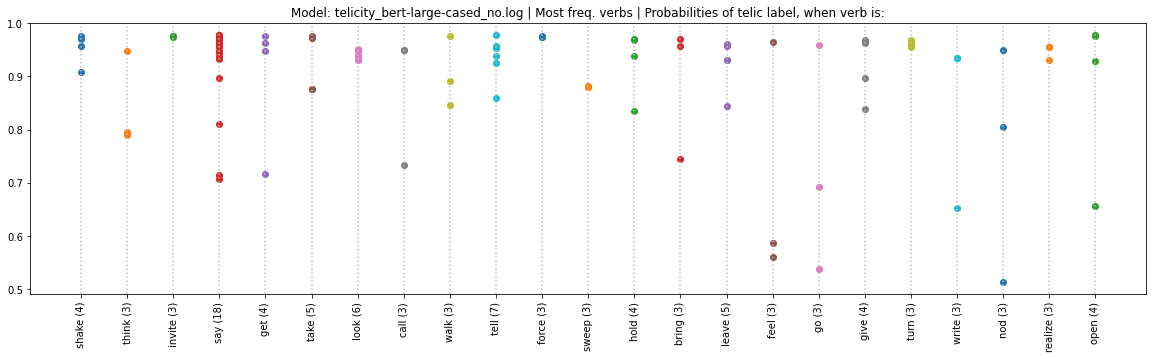

<ipython-input-91-c21153ff6787>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xticklabels(labels)


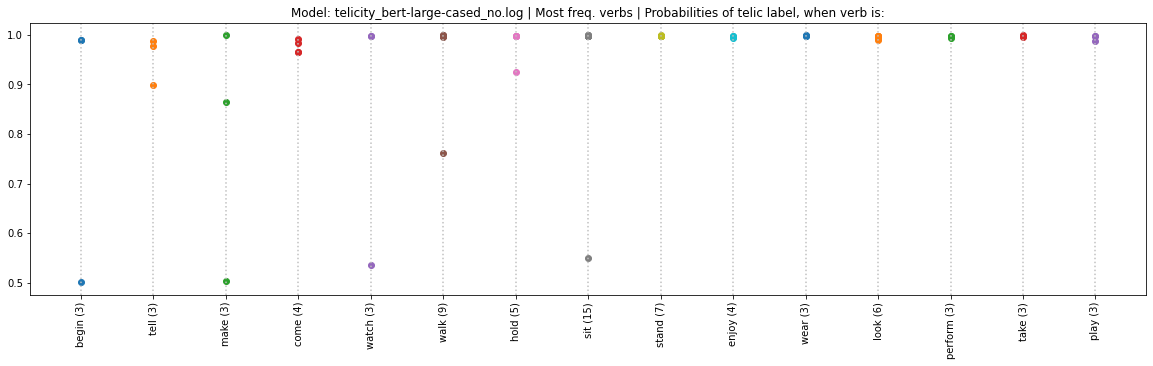

In [91]:
x = [n for n in range(len(most_common_telic))]
y = list(most_common_telic.values())
    
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
for xe, ye in zip(x, y):
    plt.axvline(xe, 0, 1, color='silver', linestyle=':')
    plt.scatter([xe] * len(ye), ye)

plt.title('Model: ' + f + ' | Most freq. verbs | Probabilities of telic label, when verb is:')
labels = [k + ' (' + str(len(v)) + ')' for k, v in most_common_telic.items()]
plt.xticks(x, rotation=90)
plt.axes().set_xticklabels(labels)
plt.show()

# =========================
x = [n for n in range(len(most_common_atelic))]
y = list(most_common_atelic.values())
    
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
for xe, ye in zip(x, y):
    plt.axvline(xe, 0, 1, color='silver', linestyle=':')
    plt.scatter([xe] * len(ye), ye)

plt.title('Model: ' + f + ' | Most freq. verbs | Probabilities of atelic label, when verb is:')
labels = [k + ' (' + str(len(v)) + ')' for k, v in most_common_atelic.items()]
plt.xticks(x, rotation=90)
plt.axes().set_xticklabels(labels)
plt.show()

<ipython-input-121-4bb3614daf58>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xticklabels(labels)


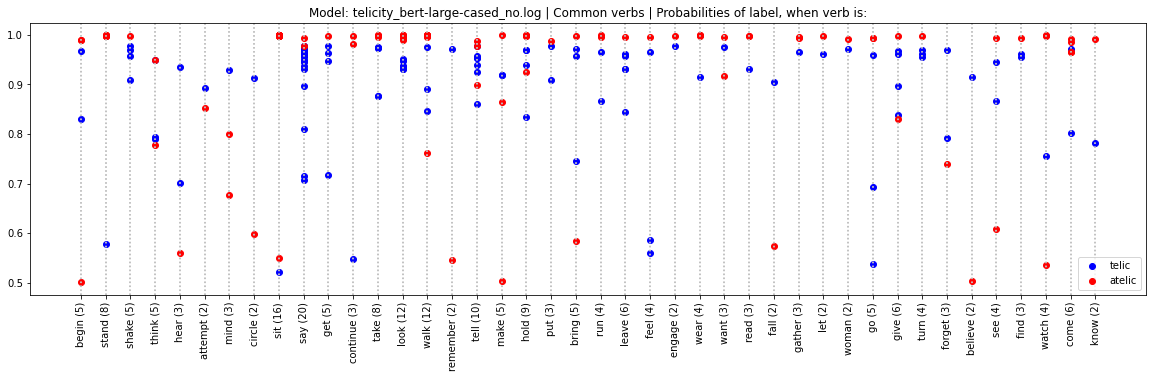

In [121]:
# plot the common verbs

common_verbs = {}
for verb in count_telic_verbs:
    if verb in count_atelic_verbs and not verb in exclude_verbs:
        common_verbs[verb] = [count_telic_verbs[verb], count_atelic_verbs[verb]]
    
x = [n for n in range(len(common_verbs))]
y1 = [v[0] for v in common_verbs.values()] # telic
y2 = [v[1] for v in common_verbs.values()] # atelic

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)

for xe, ye in zip(x, y1):
    plt.axvline(xe, 0, 1, color='silver', linestyle=':')
    telic_dots = plt.scatter([xe] * len(ye), ye, color='blue', label='telic')

for xe, ye in zip(x, y2):
    plt.axvline(xe, 0, 1, color='silver', linestyle=':')
    atelic_dots = plt.scatter([xe] * len(ye), ye, color='red', label='atelic')
    
plt.title('Model: ' + f + ' | Common verbs | Probabilities of label, when verb is:')
labels = [k + ' (' + str(len(v[0]) + len(v[1])) + ')' for k, v in common_verbs.items()]
plt.xticks(x, rotation=90)
plt.axes().set_xticklabels(labels)

plt.legend([telic_dots, atelic_dots], ['telic', 'atelic'])

plt.show()

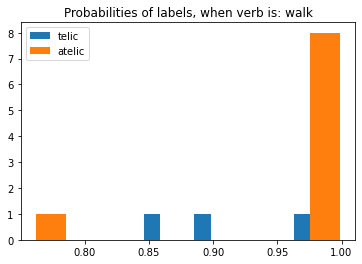

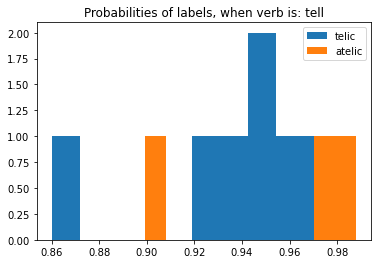

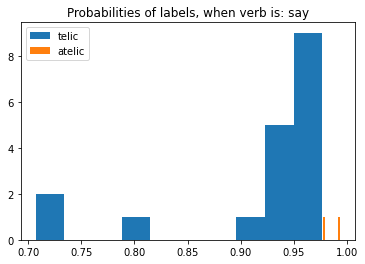

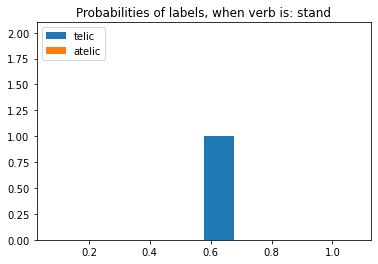

In [138]:
# specific verb plots

verb = 'walk'

plt.title('Probabilities of labels, when verb is: ' +  verb)
telic_hist = plt.hist(common_verbs[verb][0])
atelic_hist = plt.hist(common_verbs[verb][1])

plt.legend( ['telic', 'atelic'])
plt.show()
plt.clf()
#-------------------------------------
verb = 'tell'

plt.title('Probabilities of labels, when verb is: ' +  verb)
telic_hist = plt.hist(common_verbs[verb][0])
atelic_hist = plt.hist(common_verbs[verb][1])

plt.legend( ['telic', 'atelic'])
plt.show()
plt.clf()
#-------------------------------------
verb = 'say'

plt.title('Probabilities of labels, when verb is: ' +  verb)
telic_hist = plt.hist(common_verbs[verb][0])
atelic_hist = plt.hist(common_verbs[verb][1])

plt.legend( ['telic', 'atelic'])
plt.show()
plt.clf()

#-------------------------------------
verb = 'stand'

plt.title('Probabilities of labels, when verb is: ' +  verb)
telic_hist = plt.hist(common_verbs[verb][0])
atelic_hist = plt.hist(common_verbs[verb][1])

plt.legend( ['telic', 'atelic'])
plt.show()
#plt.clf()